In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct



In [2]:
LOG = '20241015-152325.csv'
my_data = np.genfromtxt('../logs/' + LOG, delimiter=' ')

time_data = my_data[:, 0]
angle_data = np.rad2deg(my_data[:, 1:])

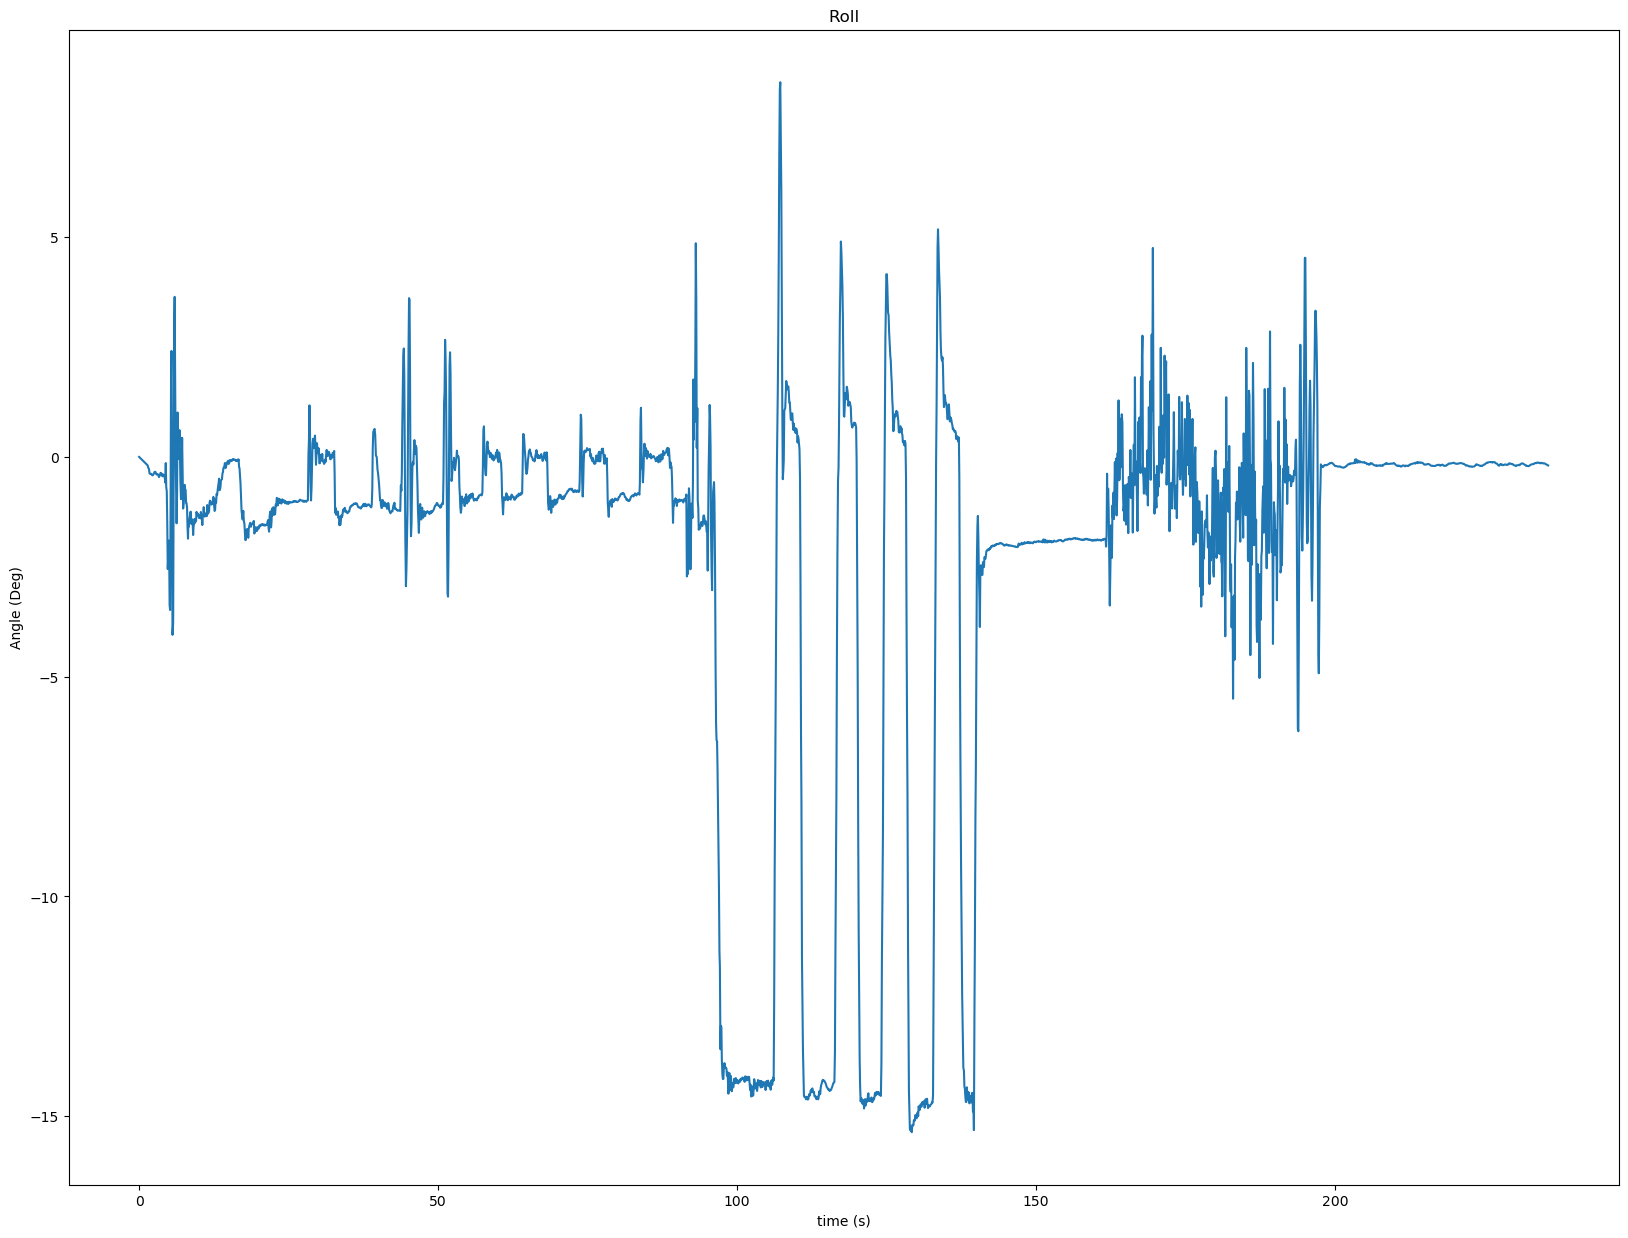

In [3]:
fig = plt.figure(figsize = (20, 15))
plt.plot(time_data, angle_data[:, 0])


plt.xlabel('time (s)')
plt.ylabel('Angle (Deg)')
plt.title('Roll')
plt.show()

{'RiseTime': 0.5057351589202881, 'SettlingTime': 2.5748581886291504, 'SettlingMin': 15.09438450703676, 'SettlingMax': 18.6662858813172, 'Overshoot': 20.485485204874195, 'Undershoot': 0.19151348828679518, 'Peak': 18.6662858813172, 'PeakTime': 1.326143503189087, 'SteadyStateValue': 15.492559829573615}


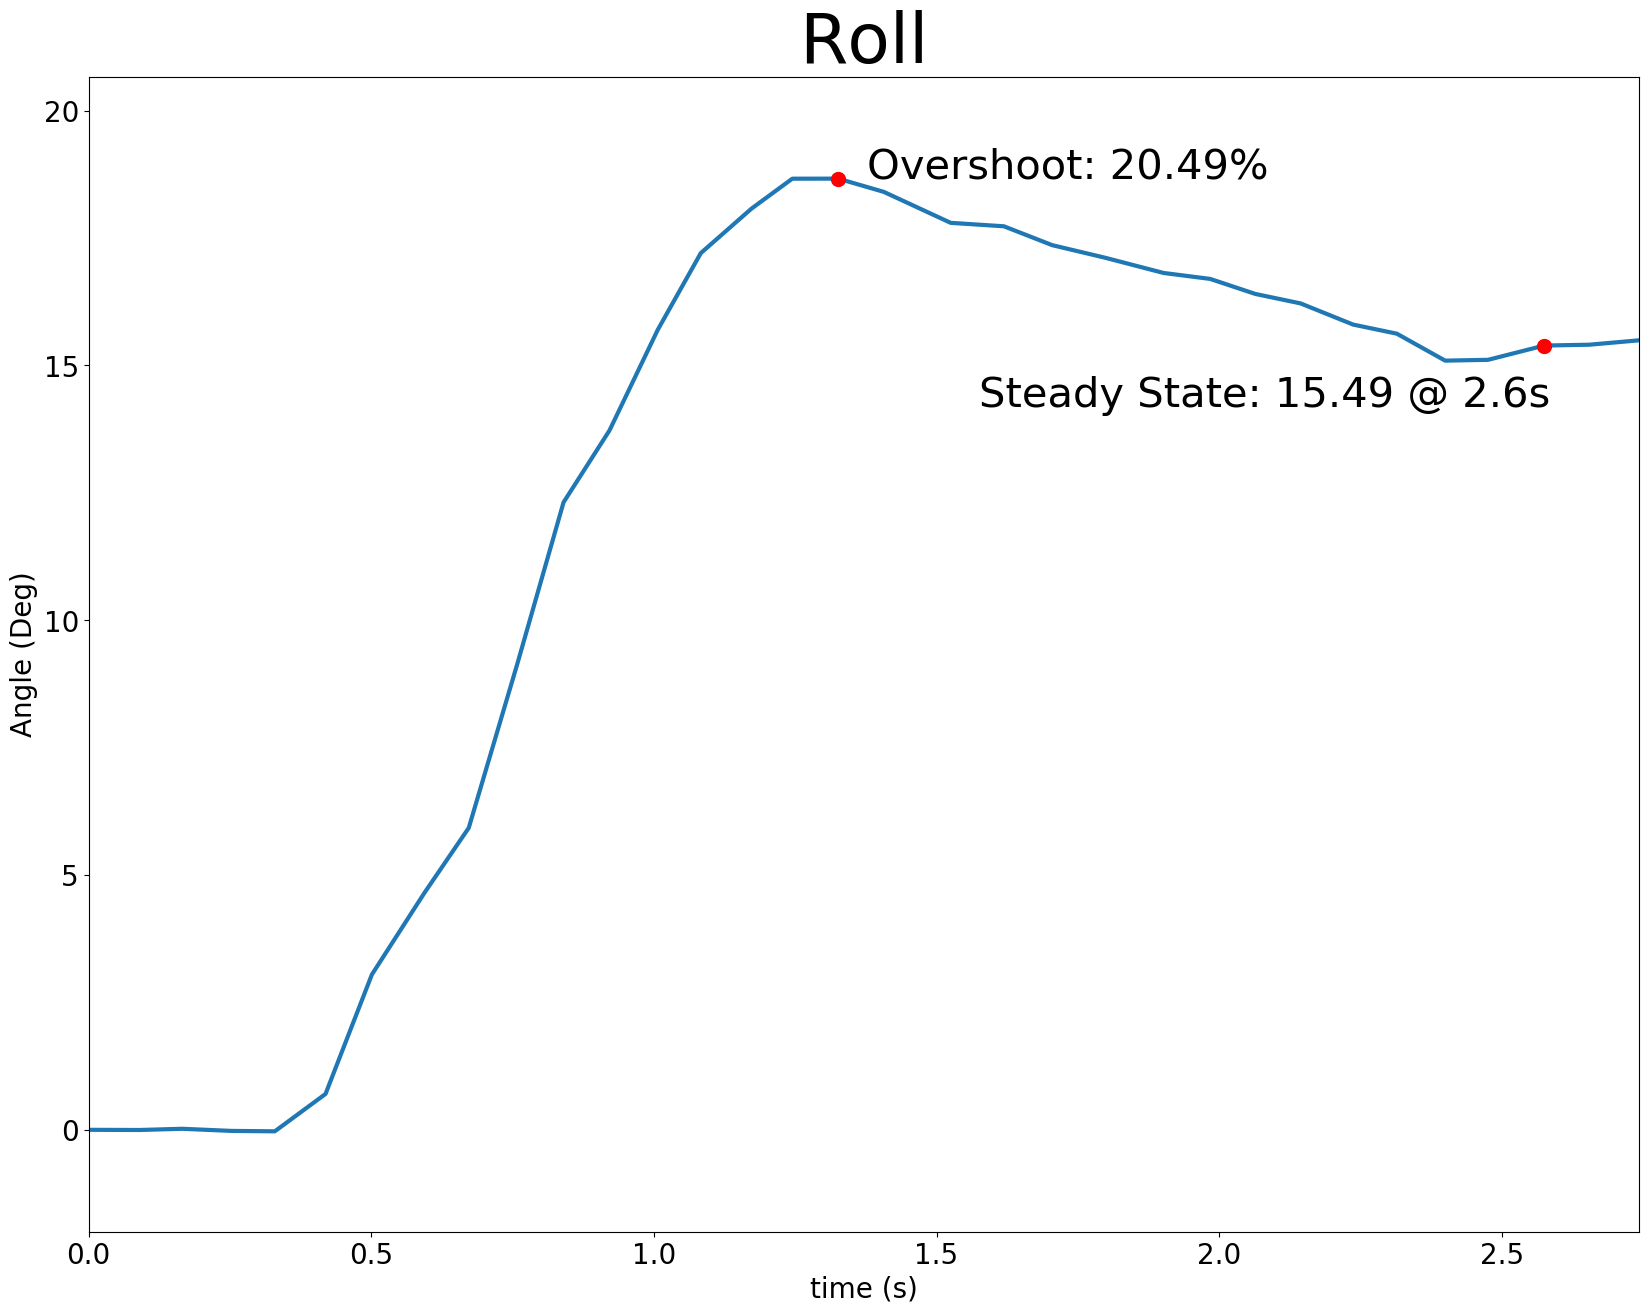

In [4]:

idxs = np.logical_and(123.7 < time_data, time_data < 126.5)

fig = plt.figure(figsize = (20, 15))
# plt.plot(time_data[idxs], angle_data[idxs, 0])
x = time_data[idxs]
x -= x[0]
y = angle_data[idxs, 0]
y -= y[0]
step_data = ct.step_info(y, x)

print(step_data)

max_idx = np.argmax(y)
settle_index = np.where(x == step_data['SettlingTime'])[0][0]
steady_state_idx = np.where(y == step_data['SteadyStateValue'])[0][0]
rise_time_idx = np.where(x > step_data['RiseTime'])[0][0]


# plt.show()
# plt.plot([x[rise_time_idx], x[rise_time_idx]], [-20, y[max_idx]+10], linestyle="dashed", linewidth=3, alpha=0.5)
plt.plot(x,y, linewidth=3)
plt.plot(x[max_idx], y[max_idx], marker='o', markersize=10, color="red")
plt.text(x[max_idx]+0.05, y[max_idx], f'Overshoot: {step_data["Overshoot"]:.2f}%', fontsize=30)


plt.plot(x[settle_index], y[settle_index], marker='o', markersize=10, color="red")
plt.text(x[settle_index]-1, y[settle_index]-1.2, f"Steady State: {y[steady_state_idx]:.2f} @ {step_data['SettlingTime']:.1f}s", fontsize=30)

# plt.legend(['Roll Angle'], fontsize=30)
plt.xlim([0, x[-1]])
plt.ylim([-2, y[max_idx]+2])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('Angle (Deg)', fontsize=20)
plt.title('Roll', fontsize=50)

plt.show()

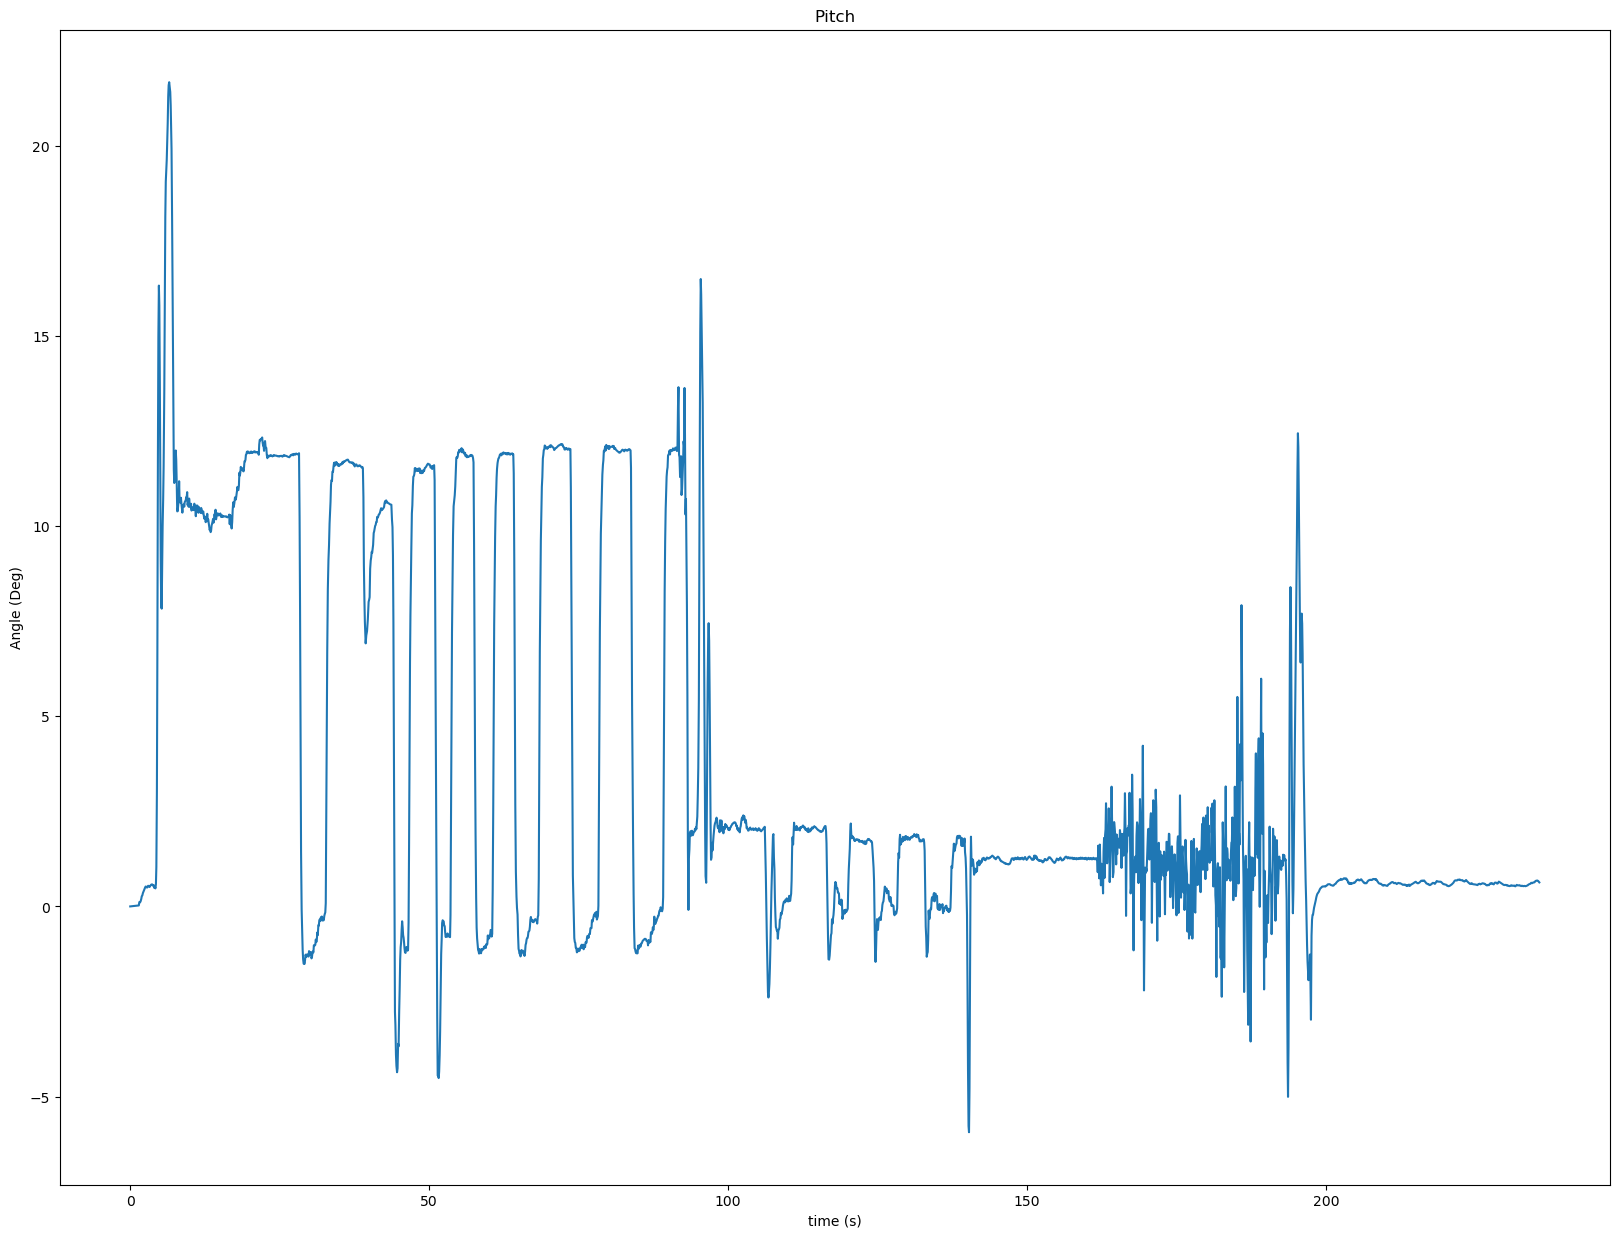

In [5]:
fig = plt.figure(figsize = (20, 15))
plt.plot(time_data, angle_data[:, 1])


plt.xlabel('time (s)')
plt.ylabel('Angle (Deg)')
plt.title('Pitch')
plt.show()

{'RiseTime': 0.25101375579833984, 'SettlingTime': 2.5921599864959717, 'SettlingMin': 11.988379994357263, 'SettlingMax': 16.138560508655594, 'Overshoot': 29.93432198376413, 'Undershoot': 0, 'Peak': 16.138560508655594, 'PeakTime': 1.5130596160888672, 'SteadyStateValue': 12.420552370044444}


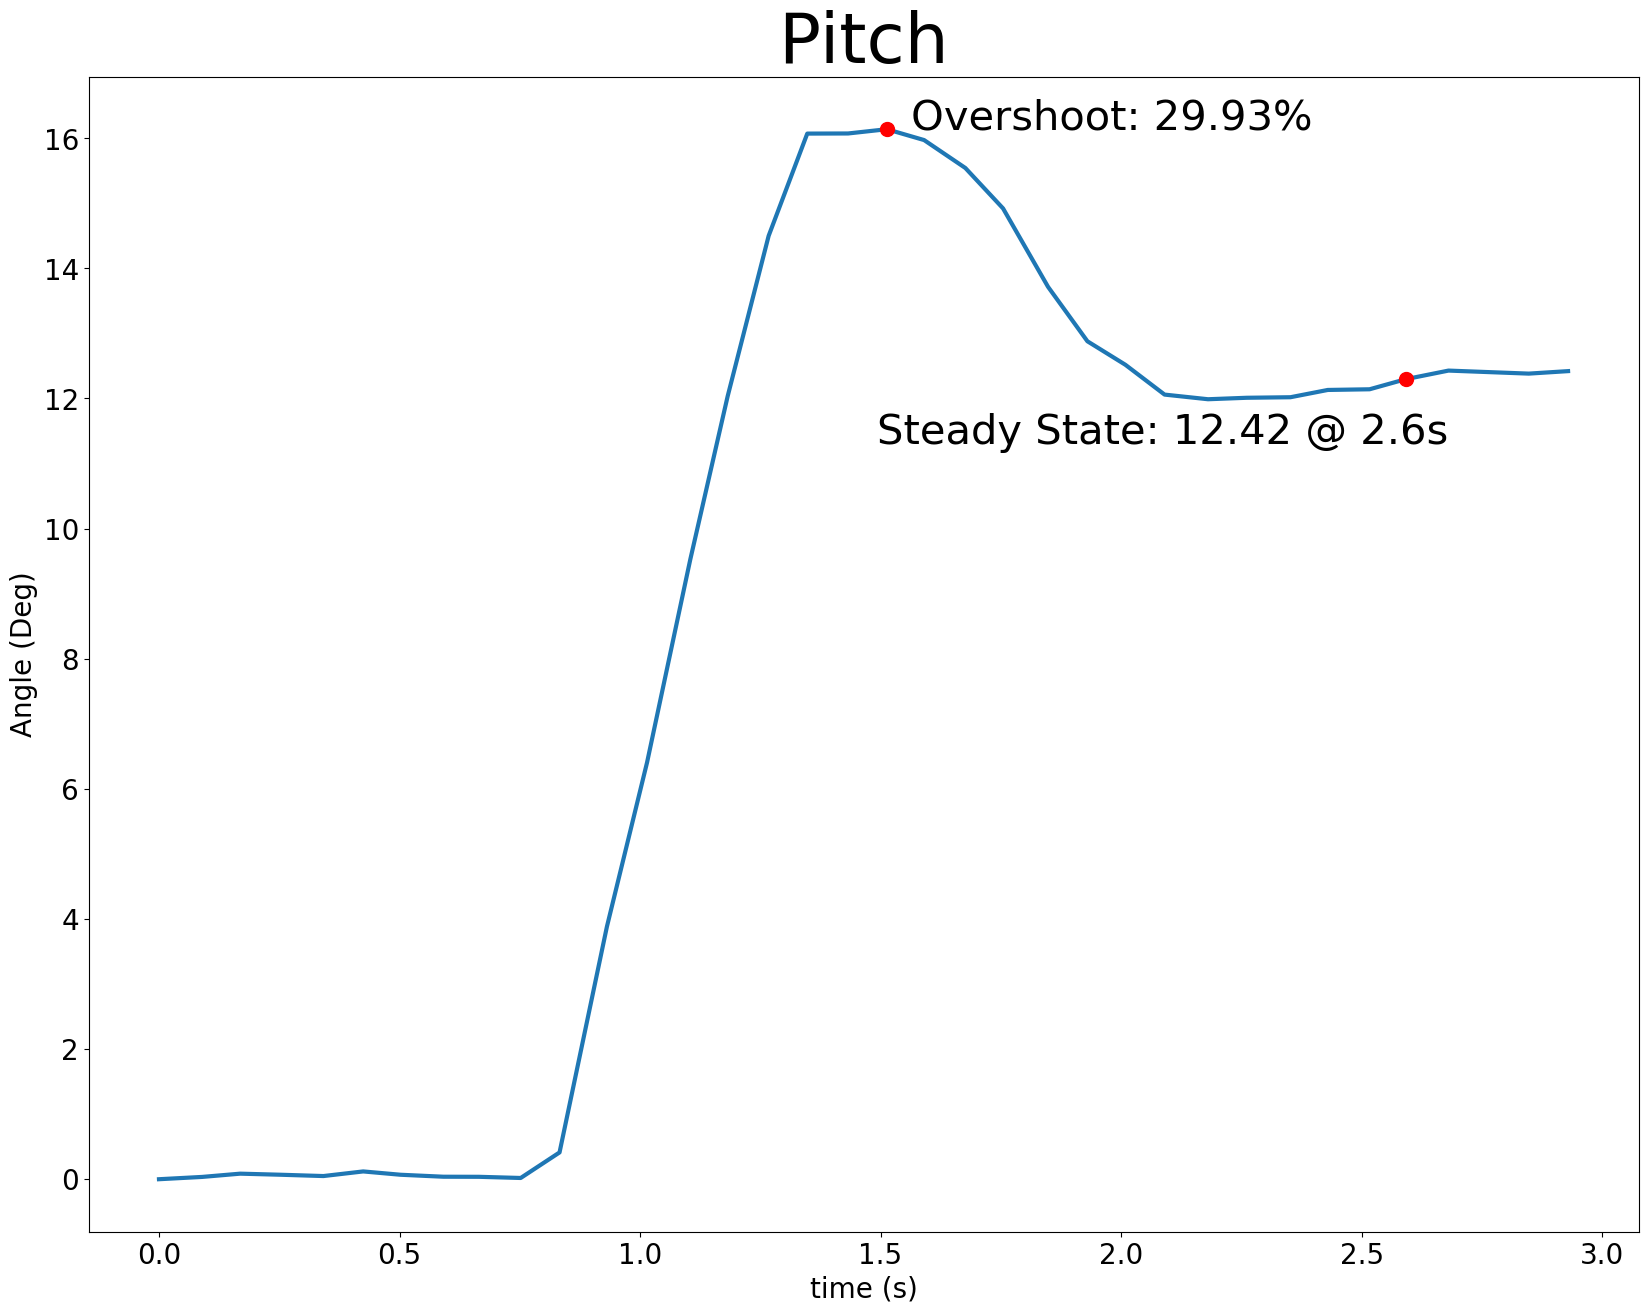

In [9]:

idxs = np.logical_and(50 < time_data, time_data < 53)

fig = plt.figure(figsize = (20, 15))
# plt.plot(time_data[idxs], angle_data[idxs, 0])
x = time_data[idxs]
x -= x[0]
y = angle_data[idxs, 1]*-1
y -= y[0]
step_data = ct.step_info(y, x)

print(step_data)

max_idx = np.argmax(y)
settle_index = np.where(x == step_data['SettlingTime'])[0][0]
steady_state_idx = np.where(y == step_data['SteadyStateValue'])[0][0]
rise_time_idx = np.where(x > step_data['RiseTime'])[0][0]


# plt.show()
plt.plot(x,y, linewidth=3)

plt.plot(x[max_idx], y[max_idx], marker='o', markersize=10, color="red")
plt.text(x[max_idx]+0.05, y[max_idx], f'Overshoot: {step_data["Overshoot"]:.2f}%', fontsize=30)


plt.plot(x[settle_index], y[settle_index], marker='o', markersize=10, color="red")
plt.text(x[settle_index]-1.1, y[settle_index]-1, f"Steady State: {y[steady_state_idx]:.2f} @ {step_data['SettlingTime']:.1f}s", fontsize=30)

# plt.legend(['Roll Angle'], fontsize=30)
# plt.xlim([0, x[-1]])
# plt.ylim([-2, y[max_idx]+1])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('Angle (Deg)', fontsize=20)
plt.title('Pitch', fontsize=50)
plt.show()